In [82]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier


# TEST : clustering avec les semaines de travail

In [83]:
import pandas as pd

df = pd.read_csv("weeks_received.csv")
print(df.head())
print(df.info())


   week_start    week_end  distance_km  sessions  duration_min  \
0  2024-01-22  2024-01-29    23.397820         3    142.396351   
1  2024-01-29  2024-02-05    17.548586         5    110.718513   
2  2024-02-05  2024-02-12    29.044244         6    178.185437   
3  2024-02-12  2024-02-19    30.469471         4    180.692490   
4  2024-02-19  2024-02-26     0.000000         0      0.000000   

   low_intensity_pct  high_intensity_pct  variation_km  longest_run_km  \
0           0.428429            0.571571      0.000000       14.330868   
1           0.686326            0.313674     -5.849234       10.032441   
2           0.355257            0.644743     11.495659       13.732183   
3           0.882353            0.117647      1.425227       10.299794   
4           0.000000            0.000000    -30.469471        0.000000   

   weekly_load  sig_weekly_avg_km  sig_weekly_std_km  sig_trend_12w_pct  \
0   223.785970          27.738252           7.981101           2.629574   
1   145.

In [84]:
# Conversion dates
df["week_start"] = pd.to_datetime(df["week_start"])
df["week_end"] = pd.to_datetime(df["week_end"])

# Supprimer les semaines incomplètes si besoin
df = df.dropna(subset=["distance_km", "sessions", "duration_min"])

# Optionnel : filtrer une période récente
df = df[df["week_start"] >= "2024-08-12"]

df = df.reset_index(drop=True)
print("✅ Dataset prêt :", df.shape)


✅ Dataset prêt : (75, 18)


In [85]:
#cutoff_date = pd.to_datetime("2025-02-03")
#df = df[df["week_start"] >= cutoff_date]
print(df["week_start"].min())
print(len(df))

2024-08-12 00:00:00
75


In [86]:
FEATURES = [
    "distance_km",
    "sessions",
    "duration_min",
    "low_intensity_pct",
    "high_intensity_pct",
    "variation_km",
    "longest_run_km",
    "weekly_load",
]

X = df[FEATURES].copy()


In [87]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [88]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=20)

df["cluster"] = kmeans.fit_predict(X_scaled)

In [89]:
print(df.groupby("cluster")[FEATURES].mean().round(2))


         distance_km  sessions  duration_min  low_intensity_pct  \
cluster                                                           
0              30.37      3.45        189.10               0.73   
1               8.40      1.57         52.39               0.20   
2              35.23      5.50        218.43               0.40   

         high_intensity_pct  variation_km  longest_run_km  weekly_load  
cluster                                                                 
0                      0.27          2.22           12.87       241.00  
1                      0.30        -12.84            5.14        70.31  
2                      0.03          5.59            9.52       223.59  


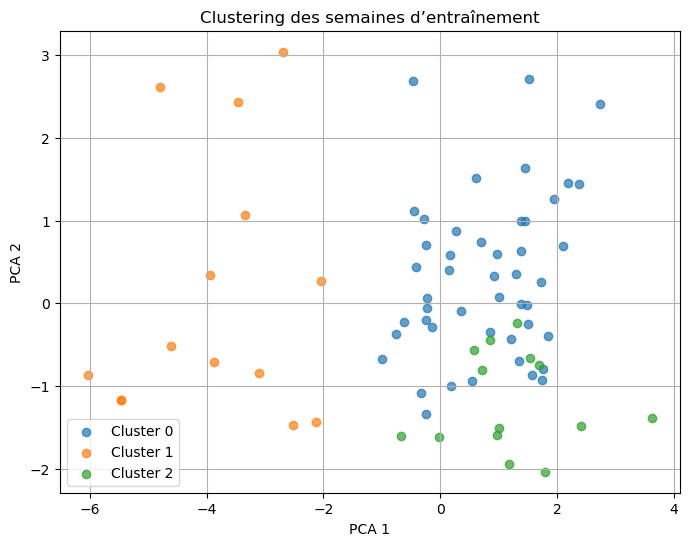

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# X_scaled : tes features normalisées
# df["cluster"] : résultat du KMeans

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df["pca1"] = X_pca[:, 0]
df["pca2"] = X_pca[:, 1]

plt.figure(figsize=(8, 6))

for c in sorted(df["cluster"].unique()):
    subset = df[df["cluster"] == c]
    plt.scatter(subset["pca1"], subset["pca2"], label=f"Cluster {c}", alpha=0.7)

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Clustering des semaines d’entraînement")
plt.legend()
plt.grid(True)
plt.show()


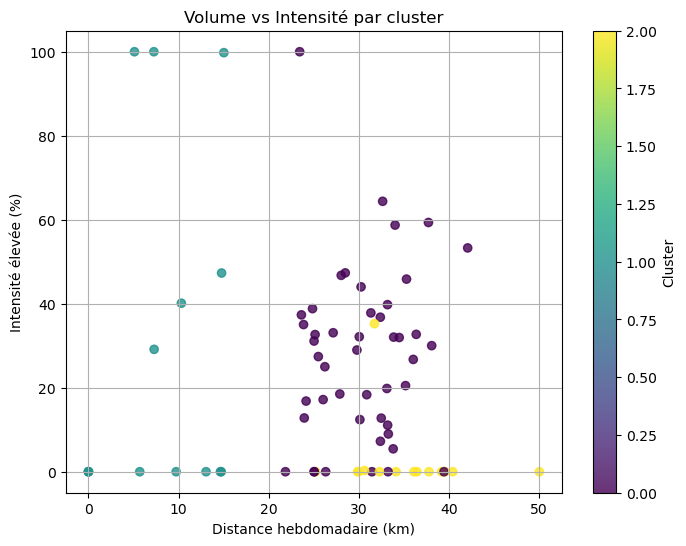

In [91]:
plt.figure(figsize=(8, 6))

plt.scatter(
    df["distance_km"], df["high_intensity_pct"] * 100, c=df["cluster"], alpha=0.8
)

plt.xlabel("Distance hebdomadaire (km)")
plt.ylabel("Intensité élevée (%)")
plt.title("Volume vs Intensité par cluster")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()


# TEST : clustering avec les seances de travail individuelles

In [110]:
df = pd.read_csv("sessions_received.csv")
df.tail()

,date,distance_km,duration_min,pace_min_per_km,z1_min,z2_min,z3_min,z4_min,z5_min,low_intensity_pct,high_intensity_pct
299,2026-01-05,2.485247,16.633087,6.692731,1.916667,9.116667,2.566667,0.000000,0.000000,1.000000,0.000000
300,2026-01-06,10.176594,71.492359,7.025176,4.950095,17.501131,28.760661,5.540192,17.160504,0.692871,0.307129
301,2026-01-08,5.597454,42.586270,7.608150,4.440018,29.140517,9.000142,0.000000,0.000000,1.000000,0.000000
302,2026-01-10,17.022094,99.382084,5.838417,0.949940,1.910030,14.130072,66.641081,16.030361,0.170478,0.829522
303,2026-01-13,10.306906,63.495290,6.160461,1.873574,11.784746,25.296585,10.816266,15.280468,0.598830,0.401170


## clustering avec les données du coeur et en supprimant les données manquantes pour low_intensity_pct&high_intensity_pct

(216, 11)
   distance_km  duration_min  pace_min_per_km  low_intensity_pct  \
0    10.813331     67.530490         6.241110           0.931497   
1     4.823310     31.919831         6.679081           0.963419   
2    10.036657     59.983220         6.007682           0.313182   

   high_intensity_pct  
0            0.068503  
1            0.036581  
2            0.686818  


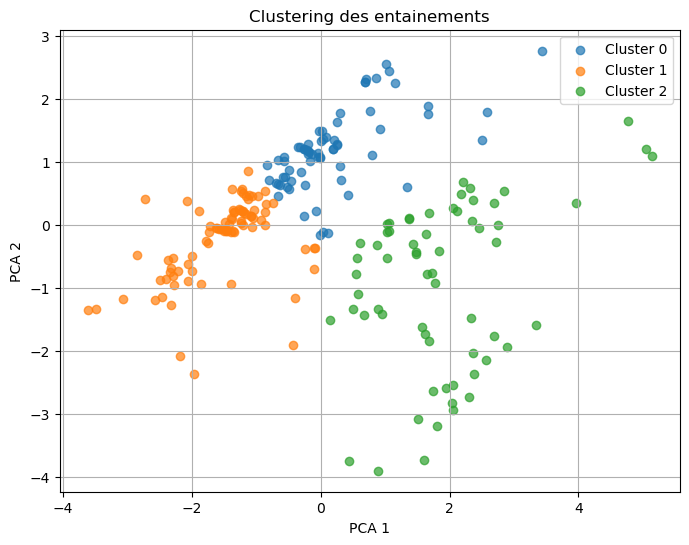

In [ ]:
df = pd.read_csv("sessions_received.csv")

sessions_clean = df[
    ~((df["low_intensity_pct"] == 0) & (df["high_intensity_pct"] == 0))
]
sessions_clean = sessions_clean.reset_index(drop=True)
df = sessions_clean
# save df dans un nouveau fichier
df.to_csv("sessions_clean.csv", index=False)

print(df.shape)
features = ["distance_km", "duration_min", "pace_min_per_km", "low_intensity_pct", "high_intensity_pct"]

X = df[features].fillna(0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans_sess = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans_sess.fit_predict(X_scaled)
# Centroids
centroids = pd.DataFrame(
    scaler.inverse_transform(kmeans_sess.cluster_centers_), columns=features
)

print(centroids)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df["pca1"] = X_pca[:, 0]
df["pca2"] = X_pca[:, 1]

plt.figure(figsize=(8, 6))

for c in sorted(df["cluster"].unique()):
    subset = df[df["cluster"] == c]
    plt.scatter(subset["pca1"], subset["pca2"], label=f"Cluster {c}", alpha=0.7)

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Clustering des entainements")
plt.legend()
plt.grid(True)
plt.show()


### Données à partir de 2025-09-14 (avec capteur cardiaque donc plus precis)

   distance_km  duration_min  pace_min_per_km  low_intensity_pct  \
0    11.149497     66.050474         5.935859           0.437439   
1     5.691435     37.833846         6.673628           0.918058   
2    11.791240     75.761204         6.437886           0.909061   

   high_intensity_pct  
0            0.562561  
1            0.081942  
2            0.090939  


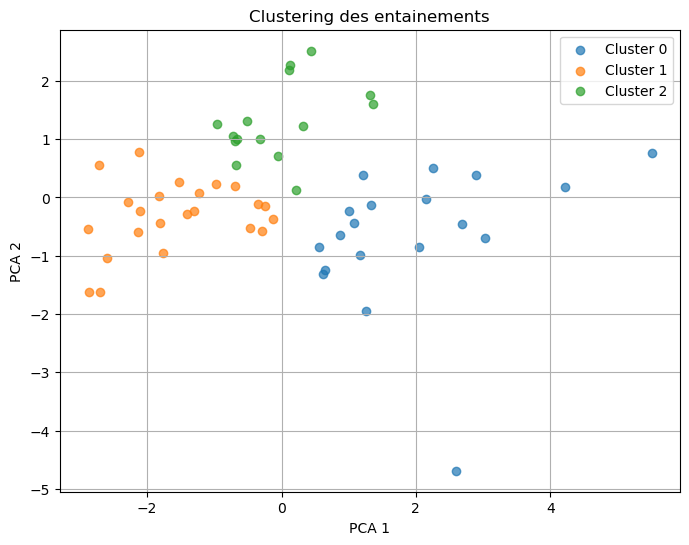

   cluster  min_distance_km  min_duration_min  min_pace  max_distance_km  \
0        0         3.013890         15.612216  5.180089        21.332739   
1        1         0.821181          5.411381  6.589755         8.373900   
2        2         9.024648         59.821317  6.628660        15.260628   

   max_duration_min  max_pace  
0        114.536257  5.369037  
1         51.572004  6.158660  
2         94.177650  6.171283  


In [125]:
sessions = pd.read_csv("sessions_received.csv")
sessions["date"] = pd.to_datetime(sessions["date"])

# Filter from 2025-09-14
sessions_filt = sessions[sessions["date"] >= "2025-09-14"].copy()

# Remove rows with no intensity info
sessions_filt = sessions_filt[
    ~(
        (sessions_filt["low_intensity_pct"] == 0)
        & (sessions_filt["high_intensity_pct"] == 0)
    )
]

features = [
    "distance_km",
    "duration_min",
    "pace_min_per_km",
    "low_intensity_pct",
    "high_intensity_pct",
]

X = sessions_filt[features].fillna(0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3-cluster KMeans
kmeans3 = KMeans(n_clusters=3, random_state=42)
sessions_filt["cluster"] = kmeans3.fit_predict(X_scaled)

# Compute centroids
centroids = pd.DataFrame(
    scaler.inverse_transform(kmeans3.cluster_centers_), columns=features
)

(
    sessions_filt[
        ["date", "distance_km", "duration_min", "pace_min_per_km", "cluster"]
    ].head(),
    sessions_filt.shape,
    centroids,
)

print(centroids)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

sessions_filt["pca1"] = X_pca[:, 0]
sessions_filt["pca2"] = X_pca[:, 1]

plt.figure(figsize=(8, 6))

for c in sorted(sessions_filt["cluster"].unique()):
    subset = sessions_filt[sessions_filt["cluster"] == c]
    plt.scatter(subset["pca1"], subset["pca2"], label=f"Cluster {c}", alpha=0.7)

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Clustering des entainements")
plt.legend()
plt.grid(True)
plt.show()

# Compute min/max distance per cluster
rows = []
for c in sorted(sessions_filt["cluster"].unique()):
    cluster_df = sessions_filt[sessions_filt["cluster"] == c]
    min_idx = cluster_df["distance_km"].idxmin()
    max_idx = cluster_df["distance_km"].idxmax()
    rows.append(
        {
            "cluster": c,
            "min_distance_km": cluster_df.loc[min_idx, "distance_km"],
            "min_duration_min": cluster_df.loc[min_idx, "duration_min"],
            "min_pace": cluster_df.loc[min_idx, "pace_min_per_km"],
            "max_distance_km": cluster_df.loc[max_idx, "distance_km"],
            "max_duration_min": cluster_df.loc[max_idx, "duration_min"],
            "max_pace": cluster_df.loc[max_idx, "pace_min_per_km"],
        }
    )

summary_df = pd.DataFrame(rows)
print(summary_df)


🔴 Cluster 0 — Séances intensives / qualitatives
- Distance : 11.5 km
- Durée : 67 min
- Allure : ~5:50 / km
- ≈ 53 % haute intensité
- Interprétation : tempo, allure soutenue, fractionné long, sorties longues avec seuil
- Impact entraînement : fort stimulus, principal facteur de fatigue, à limiter en fréquence

🟡 Cluster 1 — Footings d’endurance (modérés)
- Distance : 10.5 km
- Durée : 67 min
- Allure : ~6:22 / km
- ≈ 90 % basse intensité
- Interprétation : Endurance fondamentale, séances “cœur” de l’entraînement.
- Impact : base aérobie, faible risque, indispensable à la progression

🟢 Cluster 2 — Séances courtes très faciles / récupération
- Distance : 4.7 km
- Durée : 32 min
- Allure : ~6:45 / km
- ≈ 100 % basse intensité
- Interprétation : Récupération, reprise, ou contrainte (temps/fatigue).
- Impact : récupération active, signal de fatigue si fréquent

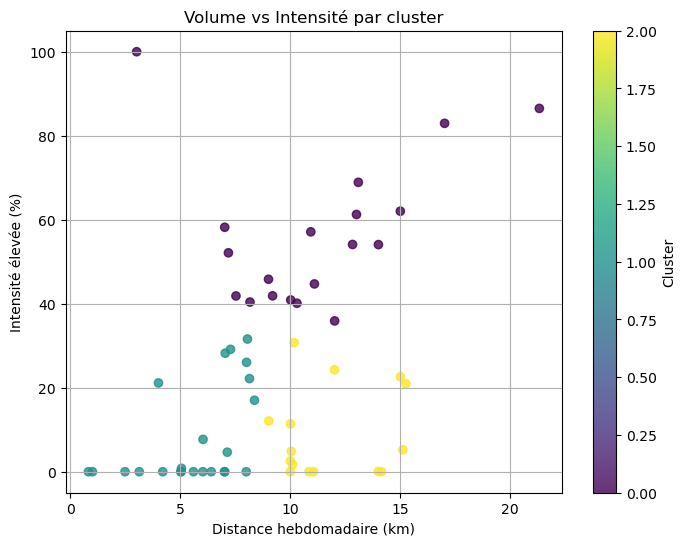

In [126]:
plt.figure(figsize=(8, 6))

plt.scatter(
    sessions_filt["distance_km"],
    sessions_filt["high_intensity_pct"] * 100,
    c=sessions_filt["cluster"],
    alpha=0.8,
)

plt.xlabel("Distance hebdomadaire (km)")
plt.ylabel("Intensité élevée (%)")
plt.title("Volume vs Intensité par cluster")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()


On observe que :
- des séances de même distance peuvent avoir des intensités très différentes
- le cluster intensif se situe clairement en haut (intensité élevée)
- les clusters faciles restent proches de 0–20 % d’intensité

Le volume seul ne suffit pas à caractériser la charge d’entraînement.

<Figure size 800x500 with 0 Axes>

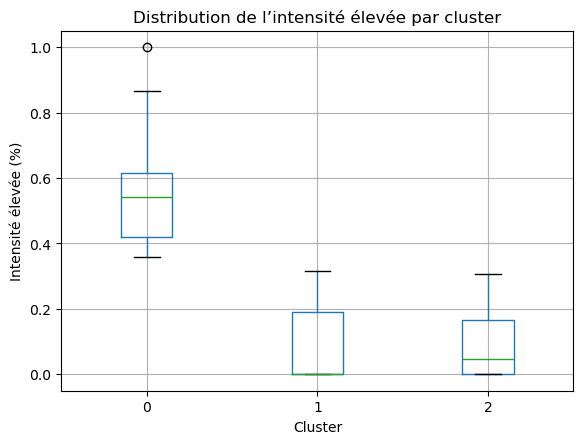

In [127]:
plt.figure(figsize=(8, 5))
sessions_filt.boxplot(column="high_intensity_pct", by="cluster", grid=True)

plt.suptitle("")
plt.title("Distribution de l’intensité élevée par cluster")
plt.xlabel("Cluster")
plt.ylabel("Intensité élevée (%)")
plt.show()


Cluster 0 :
- intensité élevée médiane autour de 50–60 %
- forte dispersion
- séances clairement exigeantes

Clusters 1 et 2 :
- intensité faible
- valeurs proches de 0
- peu de variabilité

<Figure size 800x500 with 0 Axes>

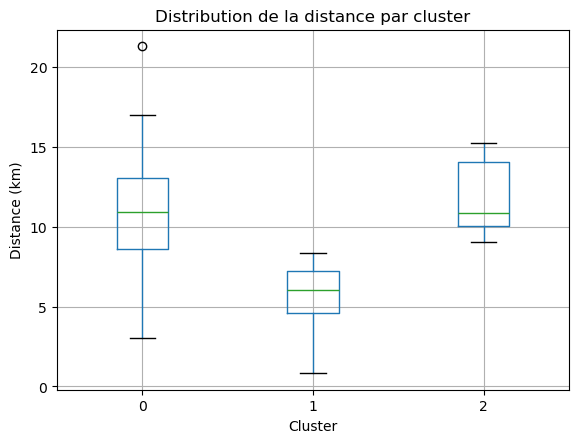

In [128]:
plt.figure(figsize=(8, 5))
sessions_filt.boxplot(column="distance_km", by="cluster", grid=True)

plt.suptitle("")
plt.title("Distribution de la distance par cluster")
plt.xlabel("Cluster")
plt.ylabel("Distance (km)")
plt.show()


- Les clusters ne sont pas séparés uniquement par la distance
- Cluster 0 et cluster 2 peuvent avoir des distances similaires
- Pourtant, ils n’ont pas la même intensité (vu graphique précédent)